# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Lintang Iqhtiar Dwi Mawarni
- Email: lintangiqhtiar@gmail.com
- Id Dicoding: lintangg

## Persiapan

### Menyiapkan library yang dibutuhkan

Melakukan import pada library yang akan digunakan untuk proses dari awal akhir 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import joblib

### Menyiapkan data yang akan diguankan

Melakukan import data yang digunakan dengan memperhatikan separator yang digunakan pada data

In [2]:
df = pd.read_csv('data.csv', sep=';')
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

Terdapat beberapa proses yang dilakukan yakni 
1. Menganalisis jumlah duplikat dan missing value
2. Menganalisis tipe data dan dekripsi statistik data
3. Melakukan EDA analisis distribusi pada data tipe ordinal, nominal dan numerik/diskrit
4. Analisis korelasi fitur menggunakan korelation matriks dan menganalisis fitur dengan target 

In [9]:
# Menganalisis jumlah duplicate dan missing values
print("Jumlah duplikat:", df.duplicated().sum())
print("Jumlah missing values:\n", df.isnull().sum())


Jumlah duplikat: 0
Jumlah missing values:
 Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [11]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


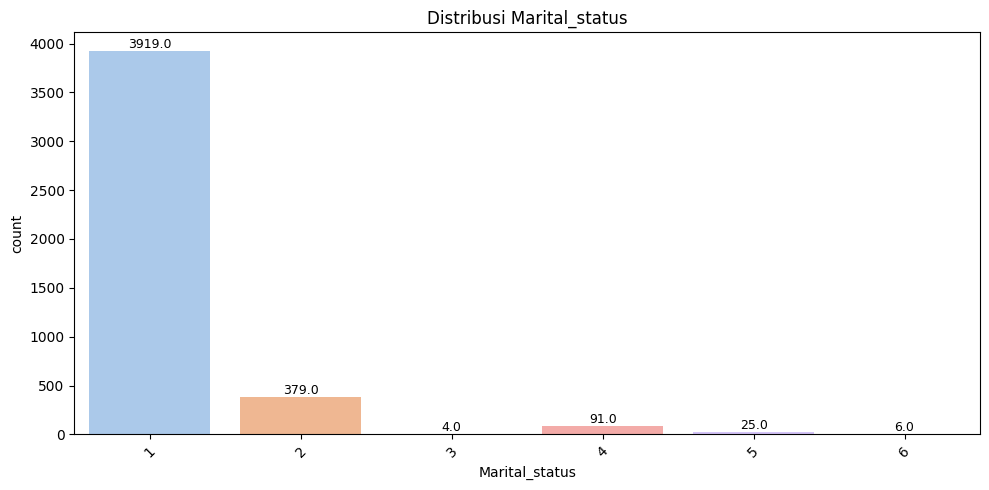

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


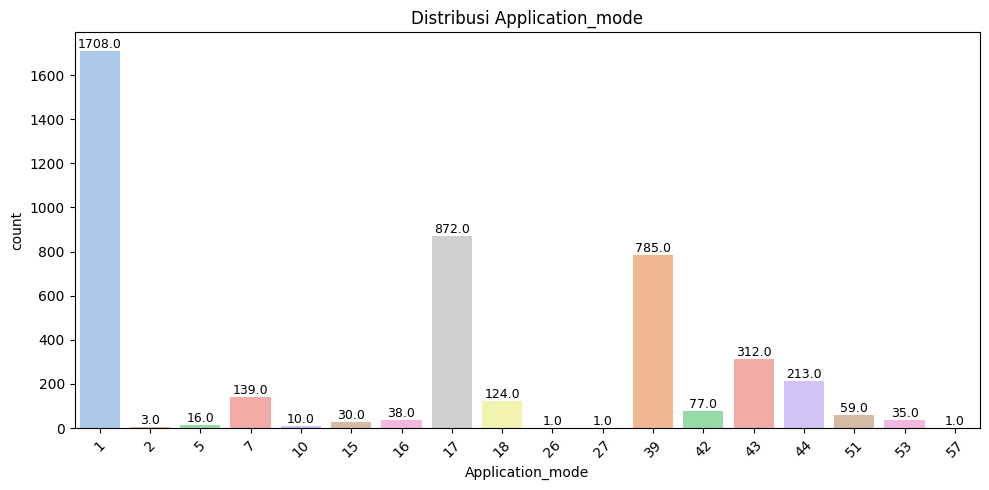

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


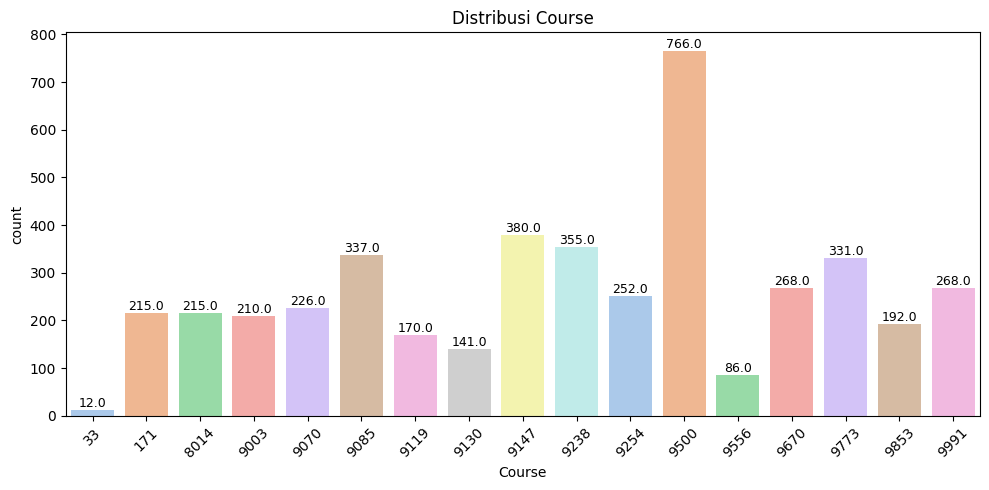

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


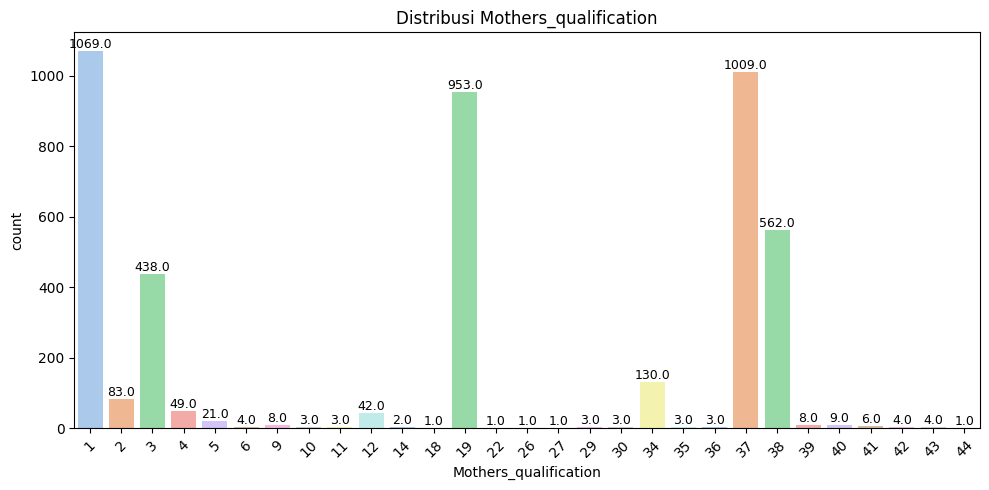

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


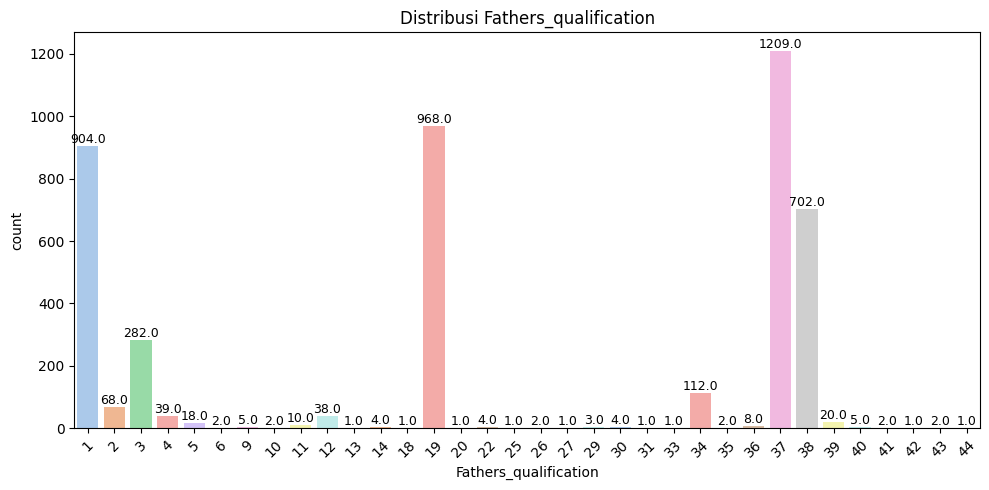

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


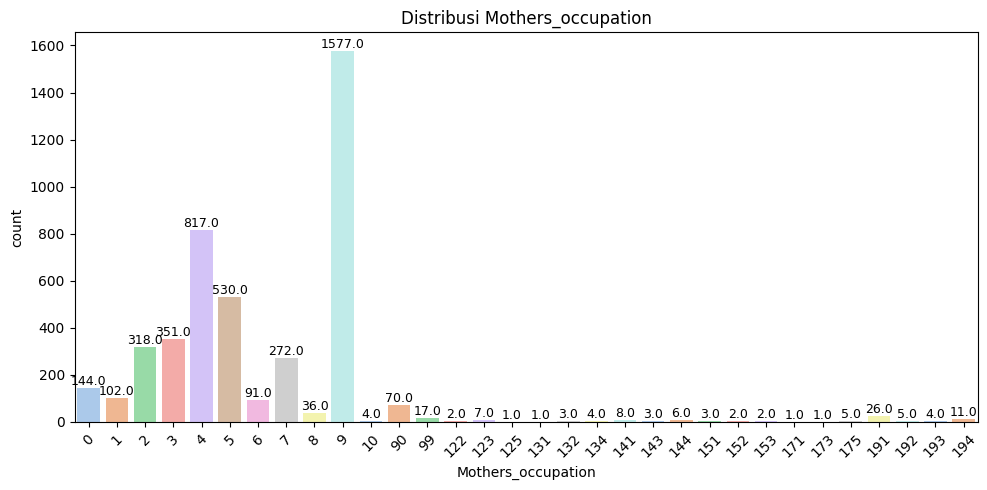

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


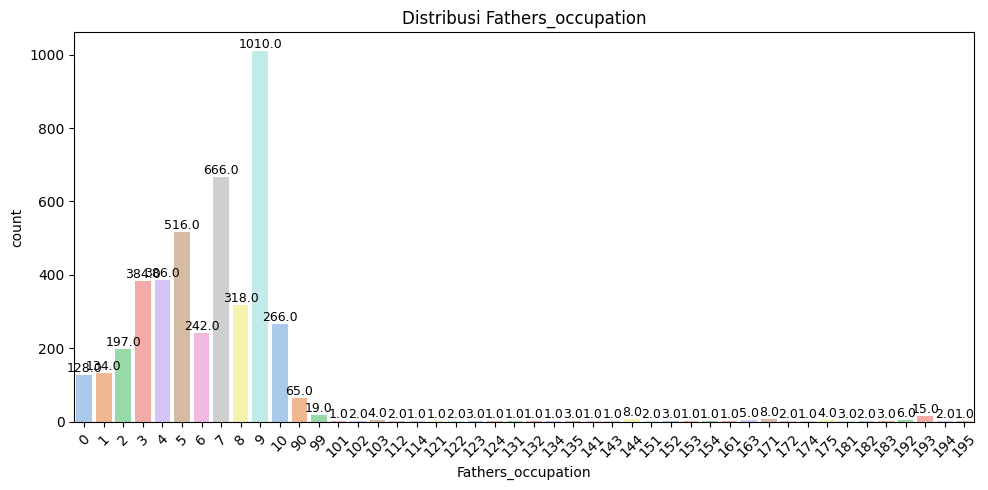

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


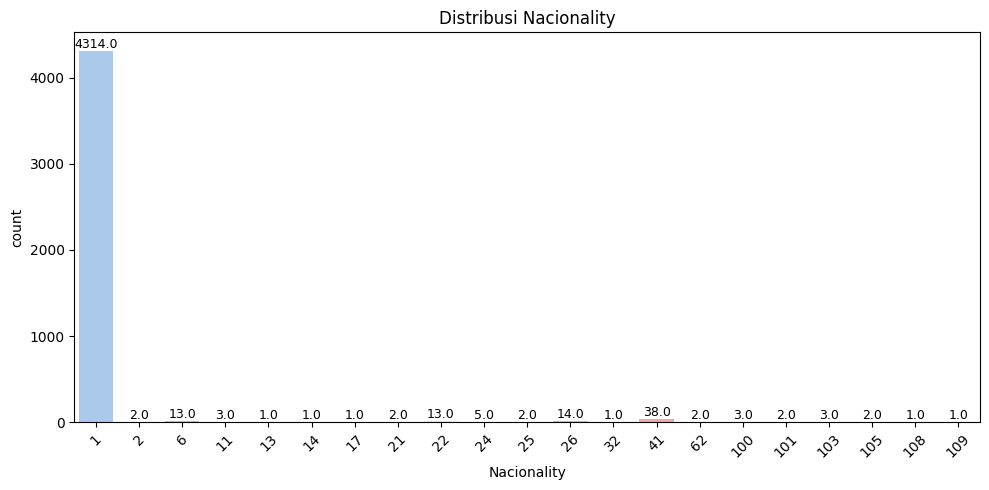

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


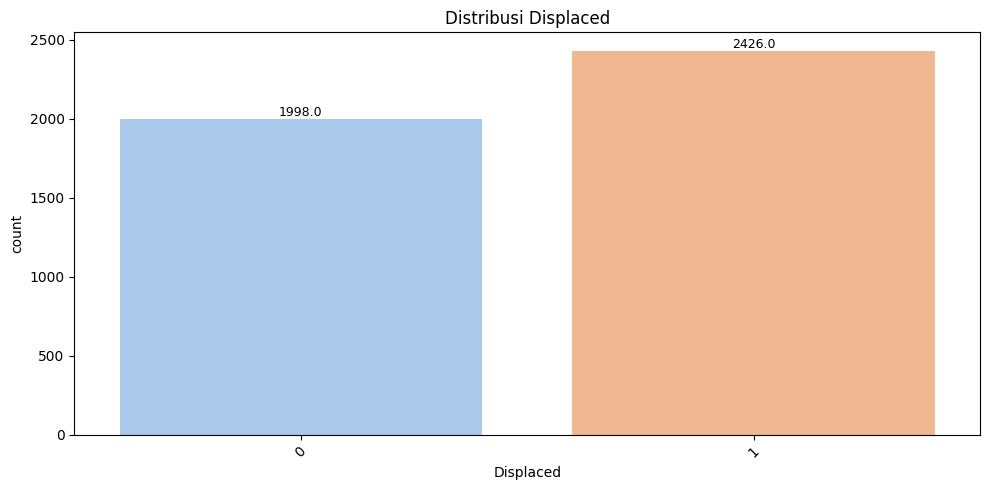

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


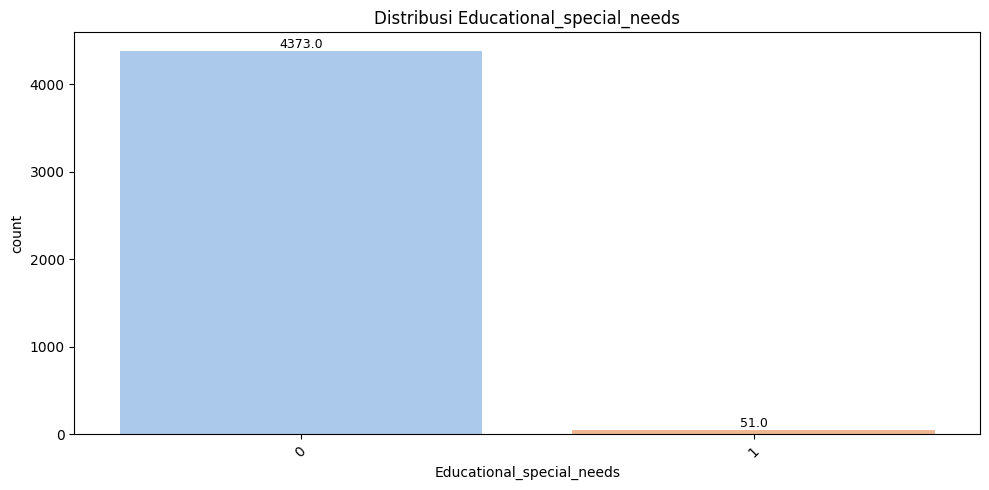

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


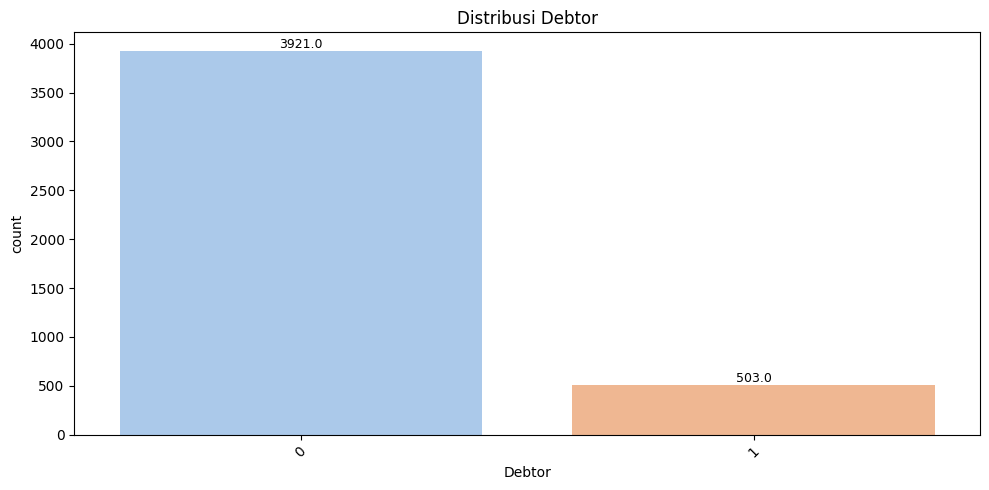

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


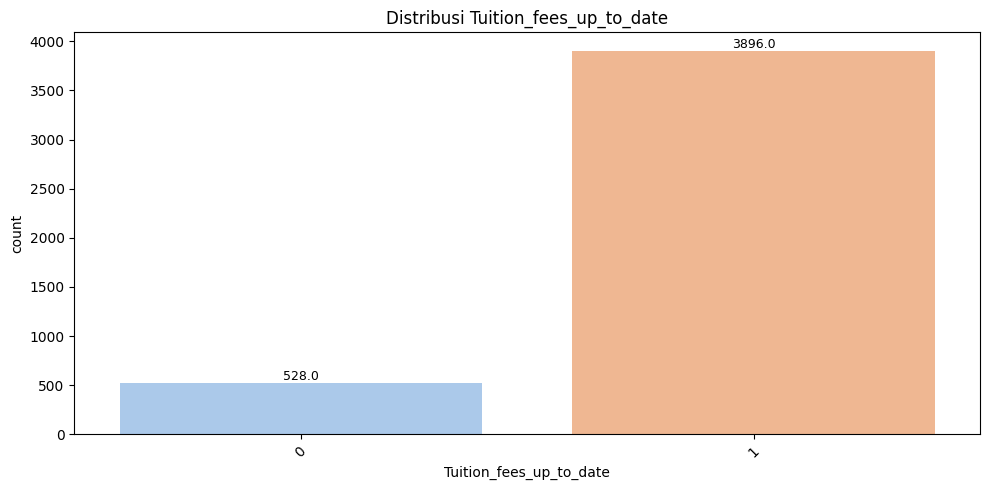

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


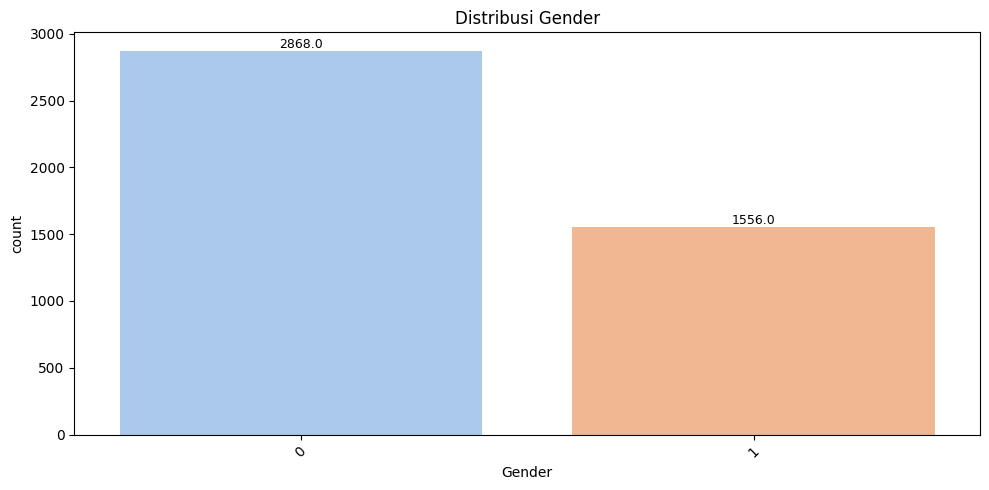

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


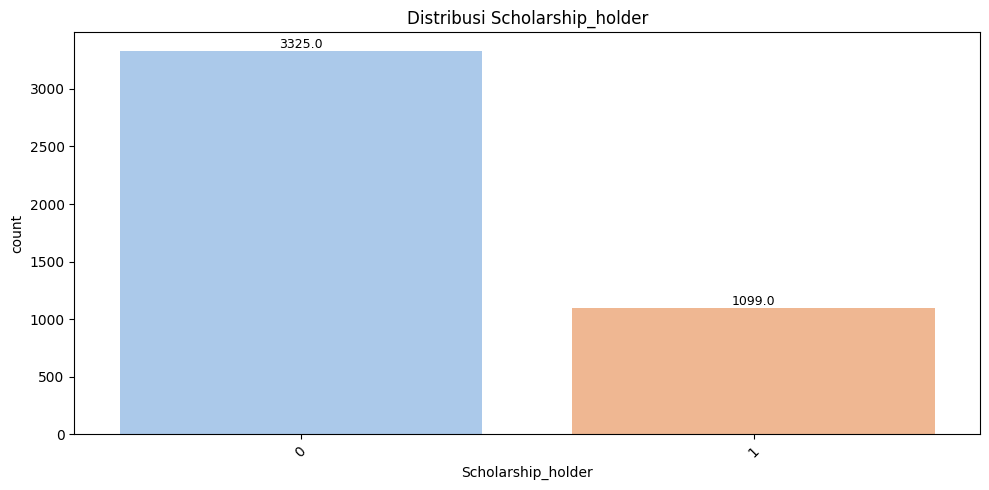

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3574915253.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


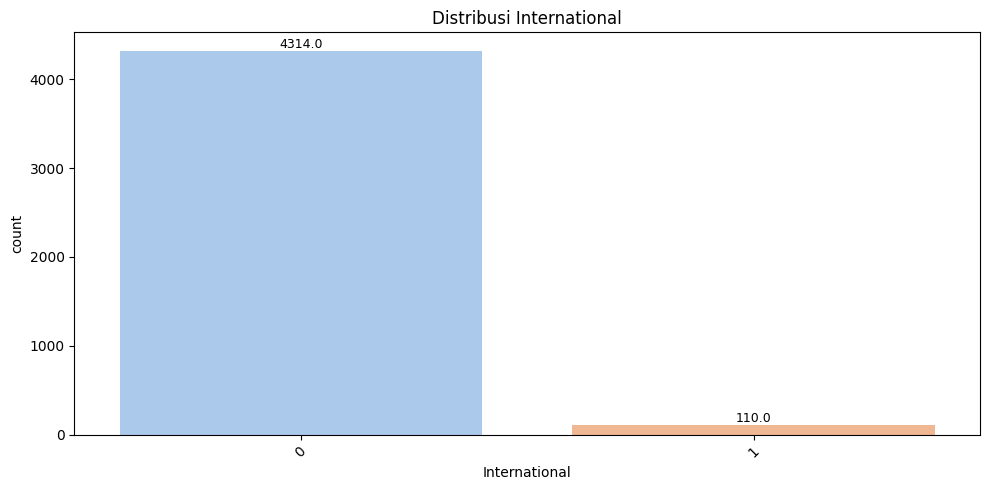

In [22]:


nominal_features = [
    "Marital_status",
    "Application_mode",
    "Course",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    "Nacionality",
    "Displaced",
    "Educational_special_needs",
    "Debtor",
    "Tuition_fees_up_to_date",
    "Gender",
    "Scholarship_holder",
    "International"
]

for feature in nominal_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
    
    # Menambahkan nilai frekuensi di atas setiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()


C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


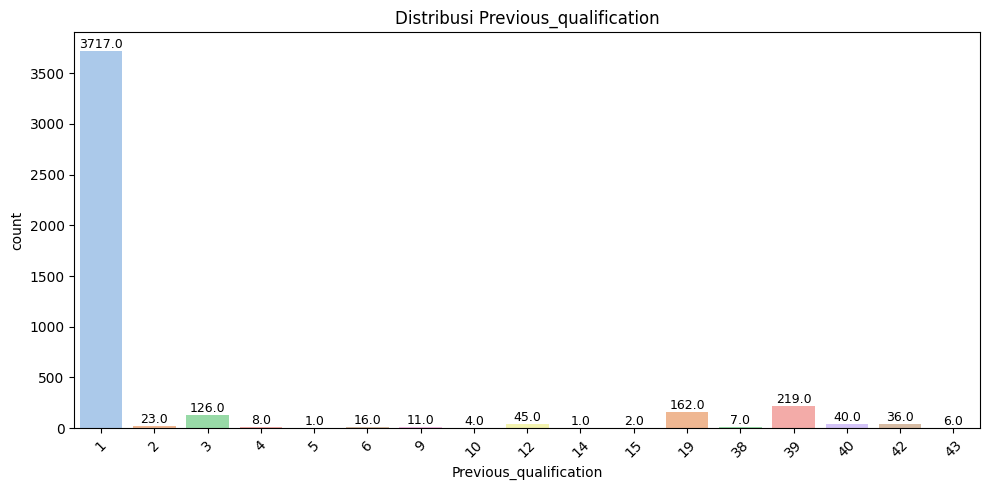

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


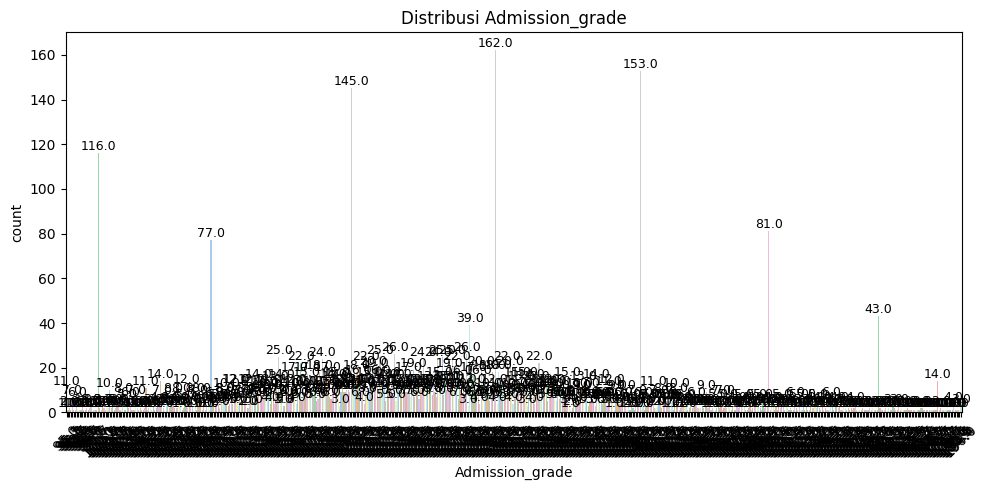

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


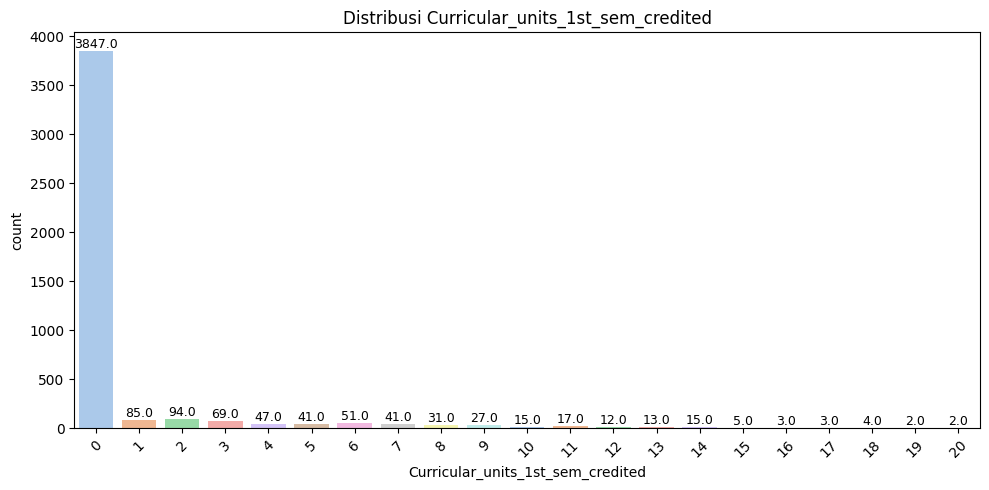

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


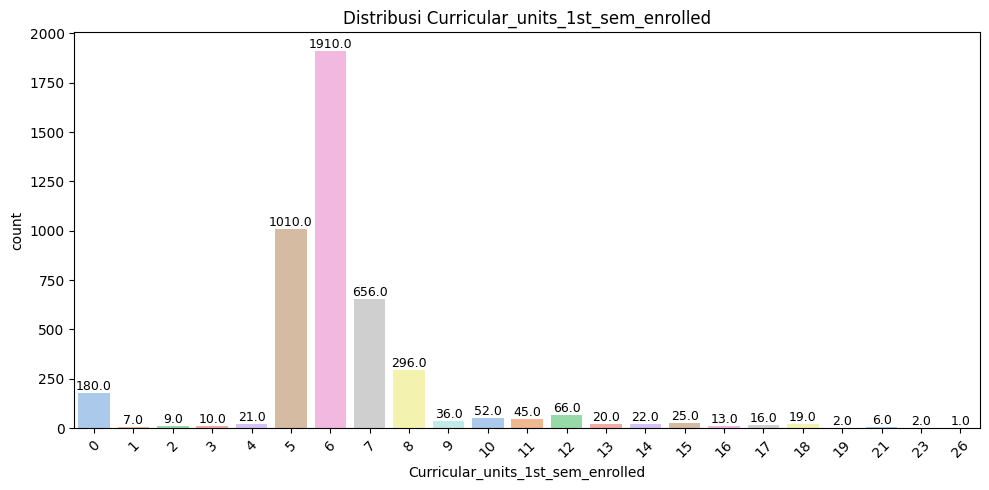

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


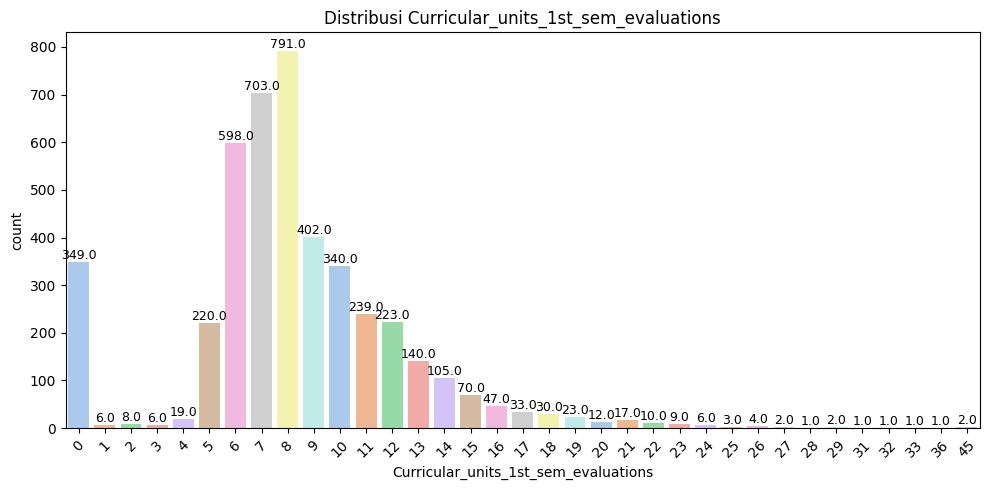

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


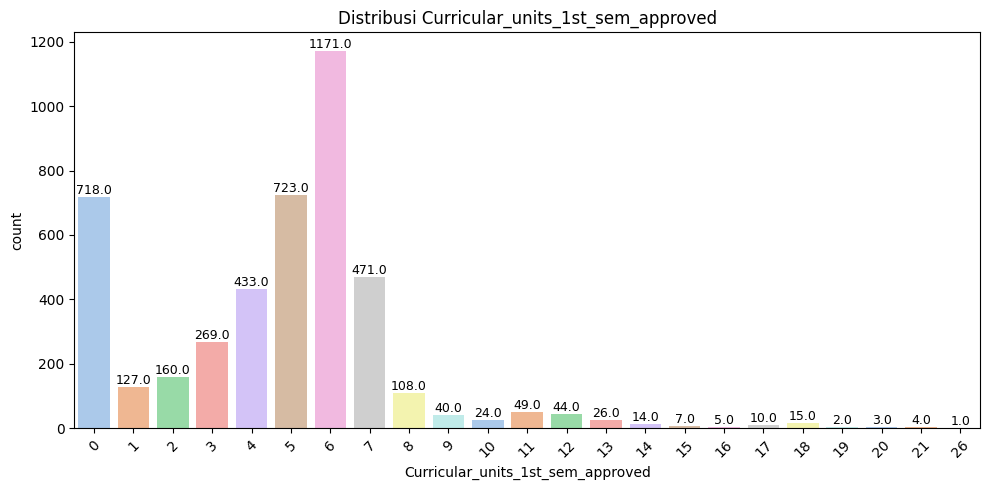

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


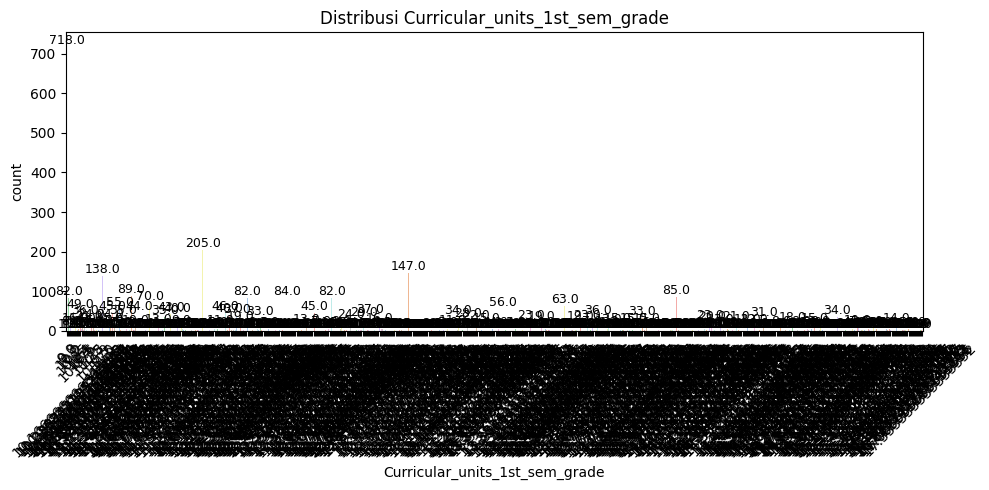

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


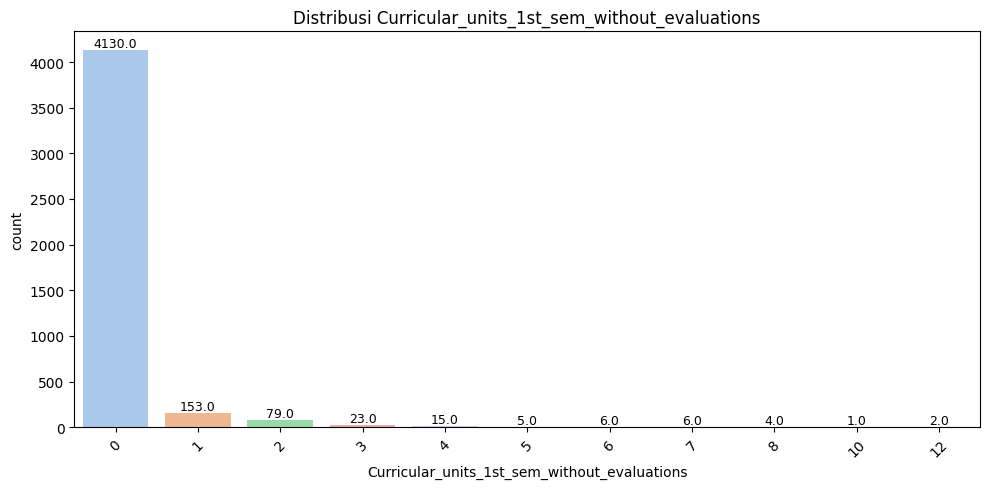

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


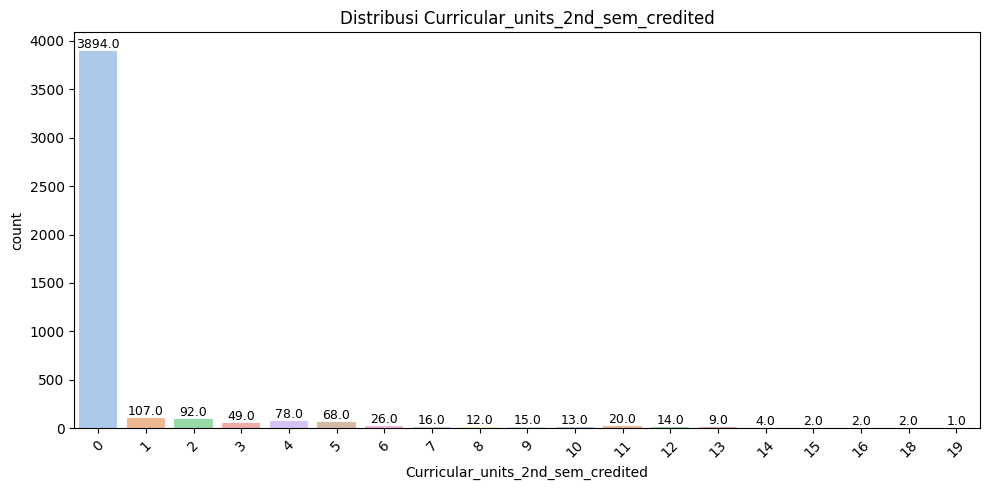

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


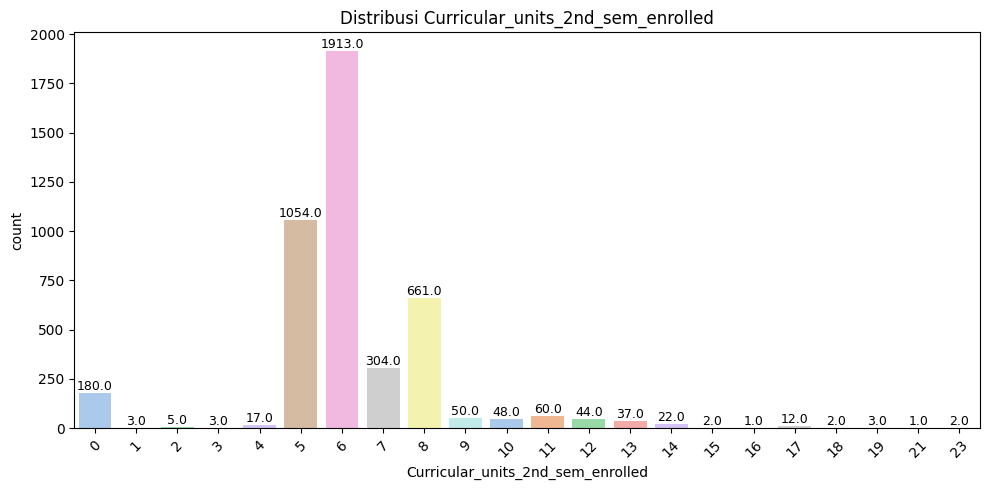

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


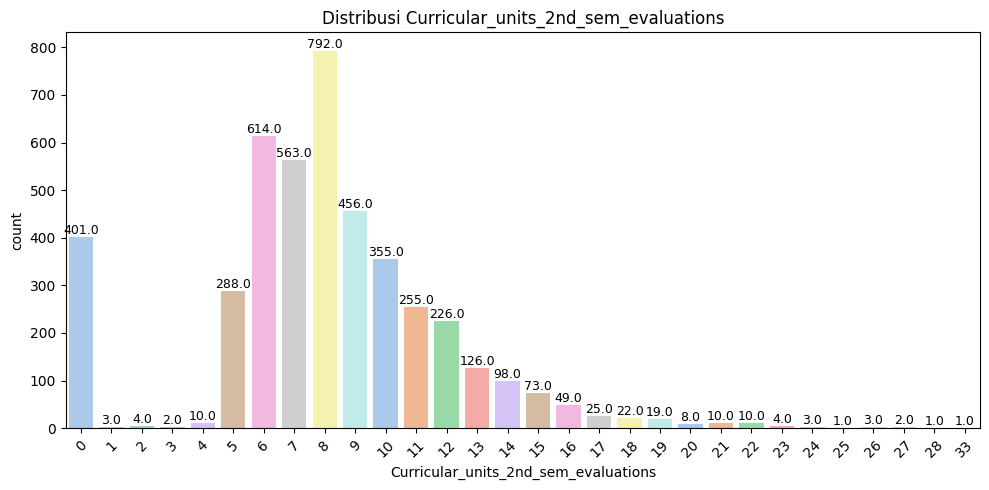

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


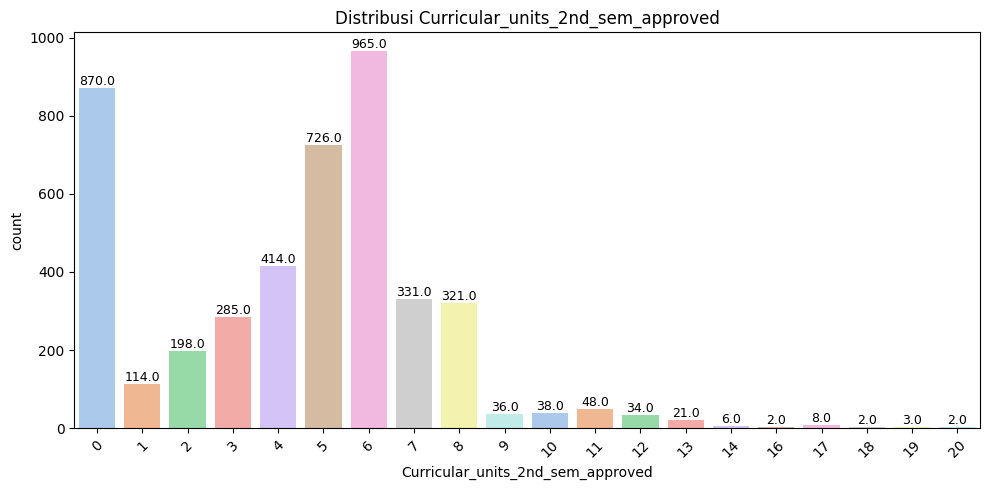

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


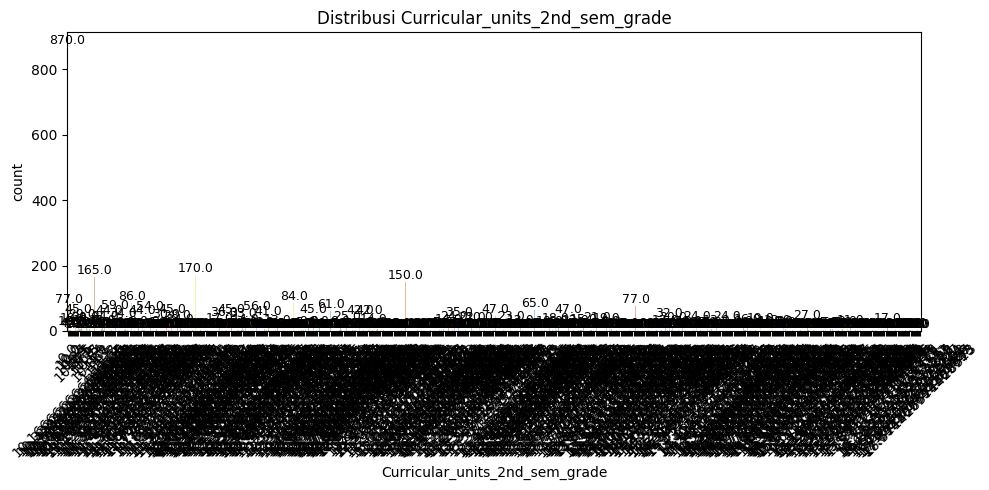

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\3351106467.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=feature, palette='pastel')


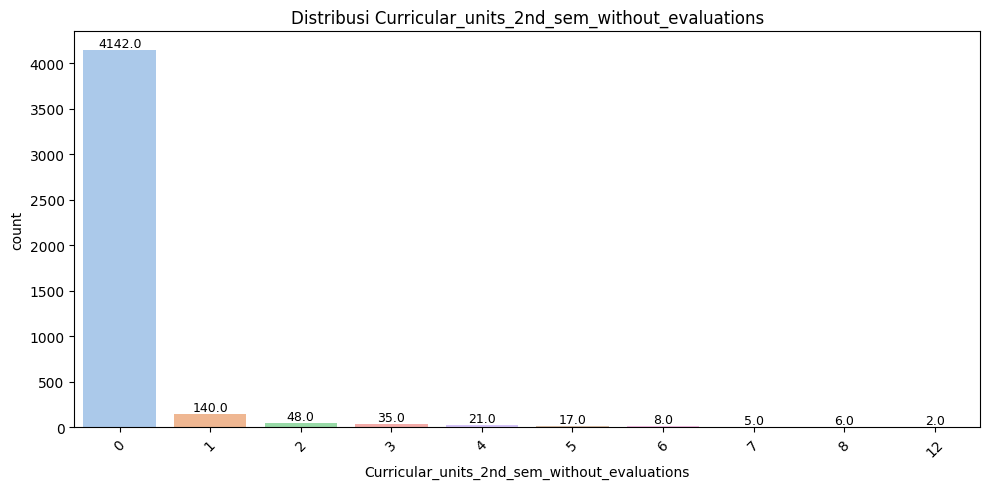

In [24]:
# Distribusi kolom ordinal
ordinal_features = [
    "Previous_qualification",
    "Admission_grade",
    "Curricular_units_1st_sem_credited",
    "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations",
    "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade",
    "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited",
    "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations",
    "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade",
    "Curricular_units_2nd_sem_without_evaluations"
]
for feature in ordinal_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(data=df, x=feature, palette='pastel')
    plt.title(f'Distribusi {feature}')
    plt.xticks(rotation=45)
    
    # Menambahkan nilai frekuensi di atas setiap bar
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9, color='black')
    plt.tight_layout()
    plt.show()

In [21]:
#melihat list kolom
print("List kolom:", df.columns.tolist())

List kolom: ['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']


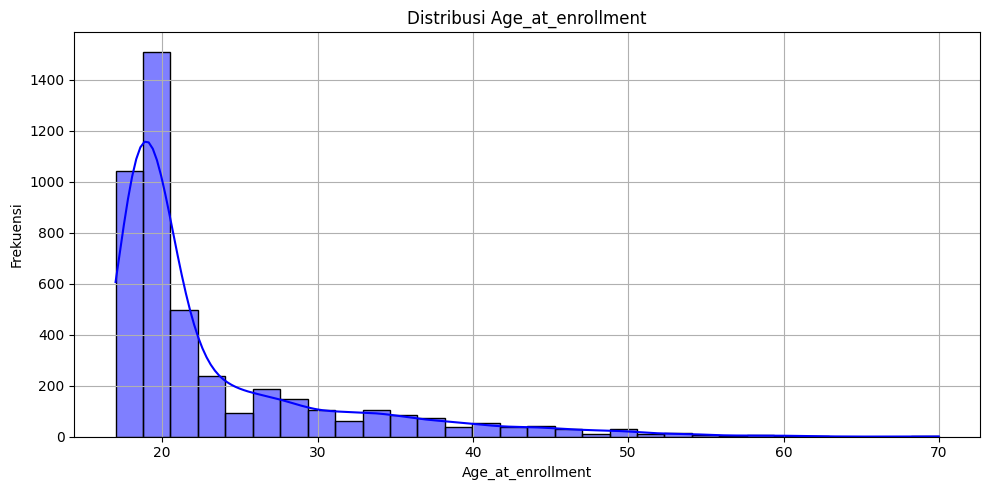

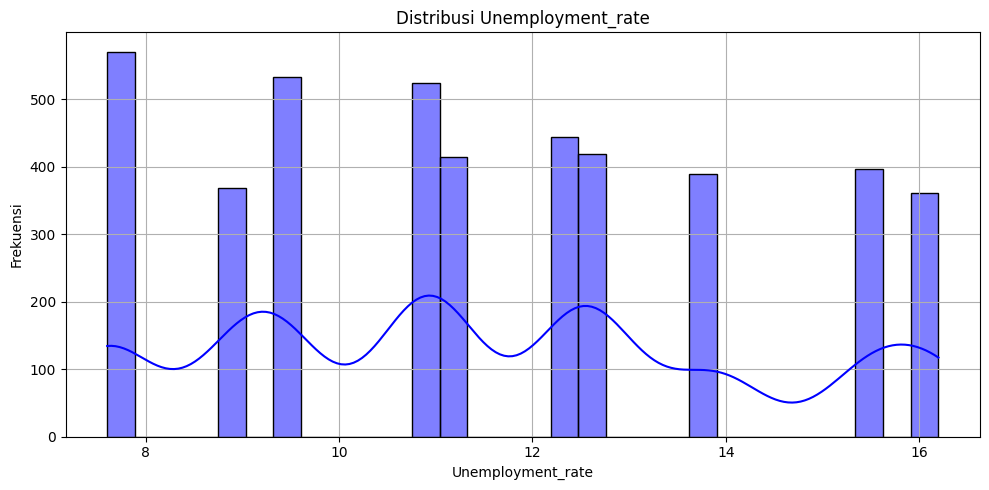

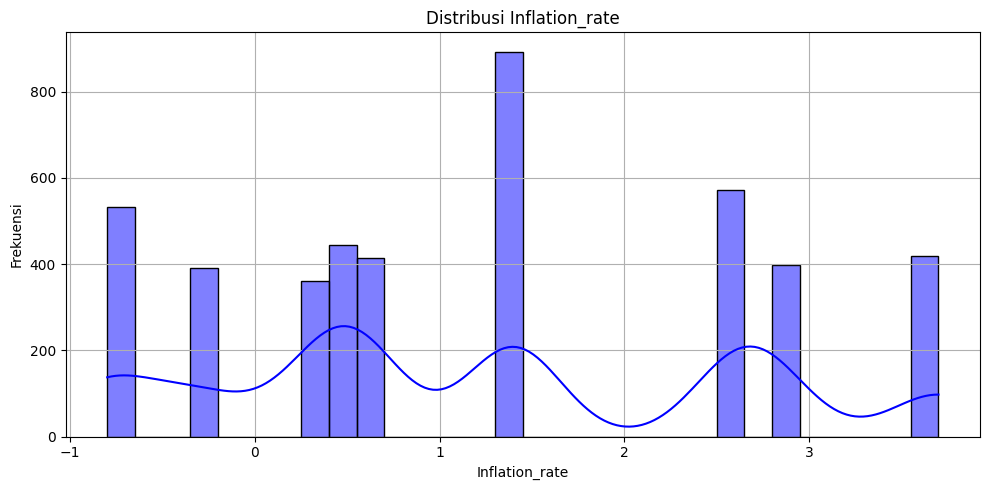

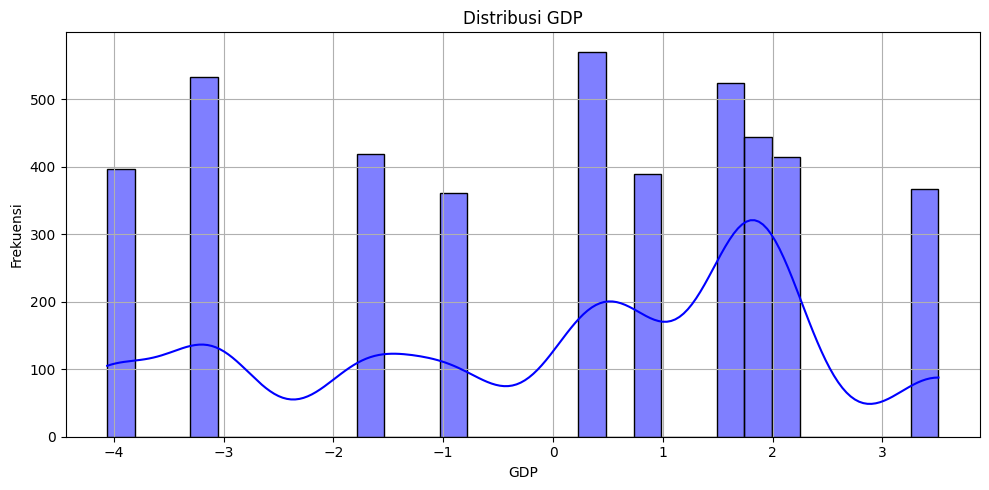

In [28]:
numerical_features = [
    "Age_at_enrollment",
    "Unemployment_rate",
    "Inflation_rate",
    "GDP"
]
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, color='blue', bins=30)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')
    plt.grid()
    plt.tight_layout()
    plt.show()
    

C:\Users\Thinkpad\AppData\Local\Temp\ipykernel_14164\1007568343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='pastel')


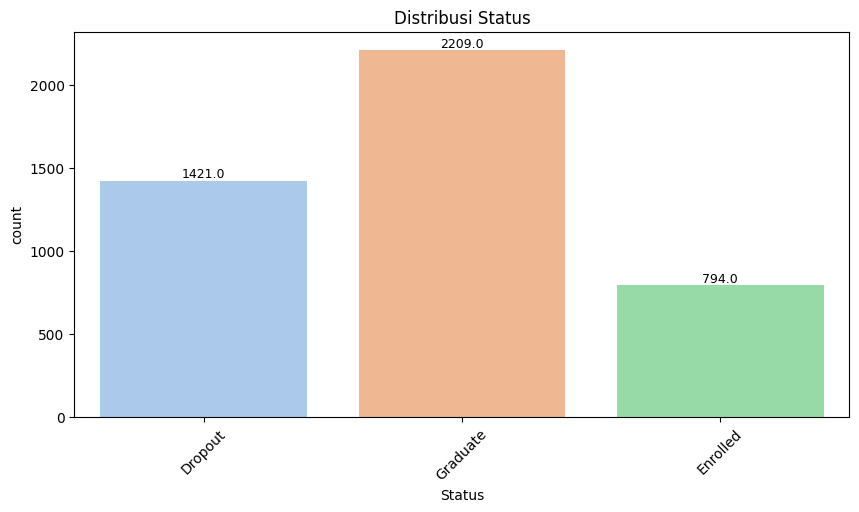

In [30]:
# Distribusi kolom target yaitu Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Status', palette='pastel')
plt.title('Distribusi Status')
plt.xticks(rotation=45)
# Menambahkan nilai frekuensi di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=9, color='black')

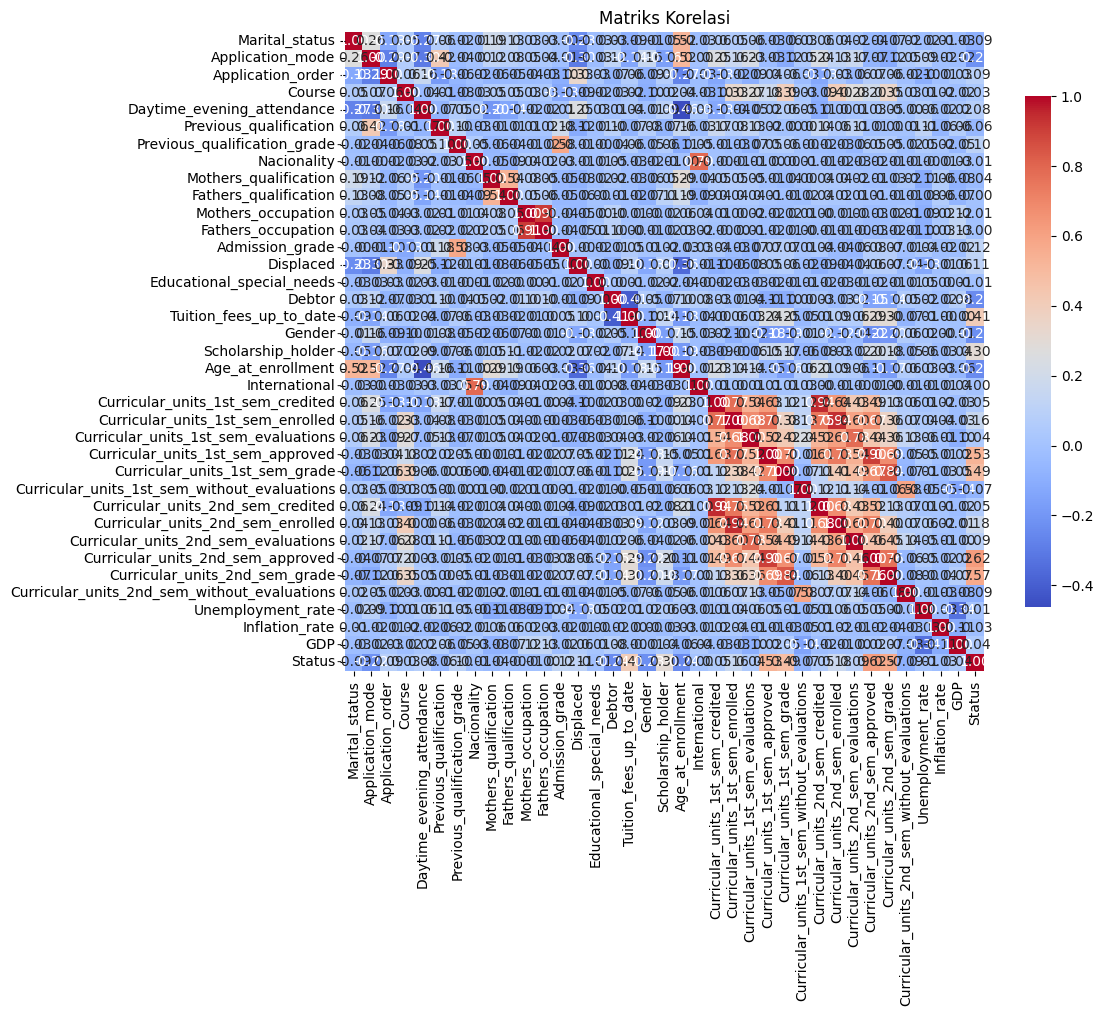

In [32]:
# Melihat Corelation matriks
data = df.copy()
label_encoder = LabelEncoder()
data['Status'] = label_encoder.fit_transform(data['Status'])
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriks Korelasi')
plt.tight_layout()
plt.show()

Korelasi dengan target (Status):
Status                                          1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited               0.04815

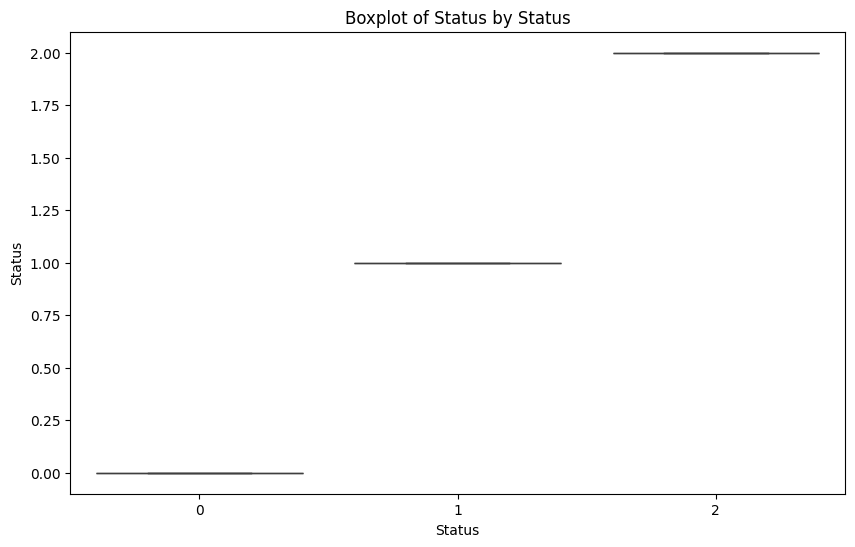

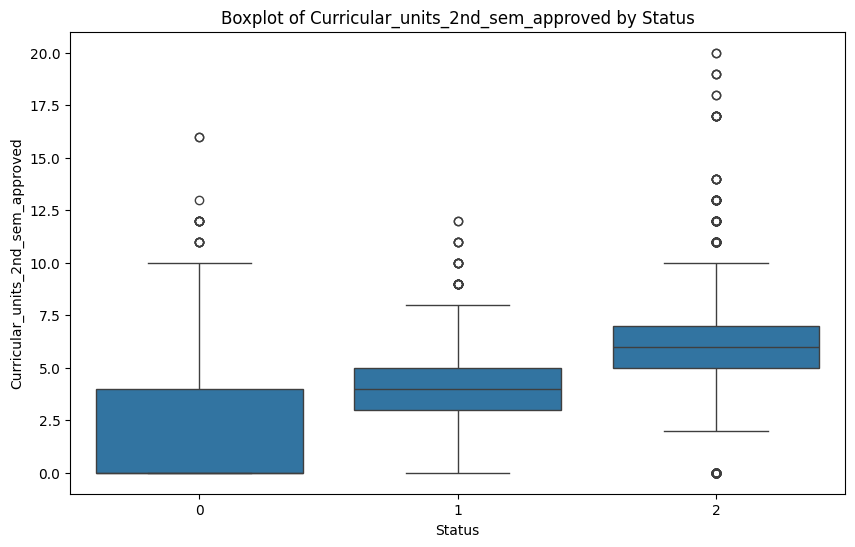

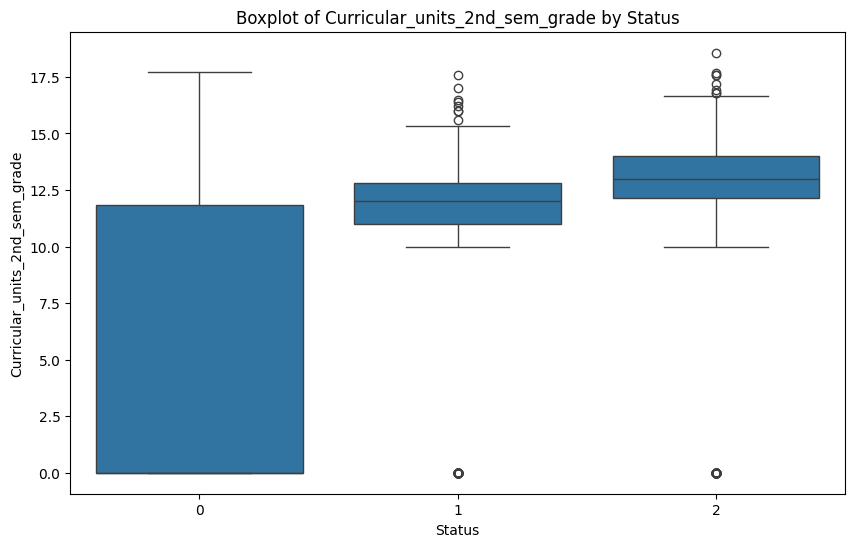

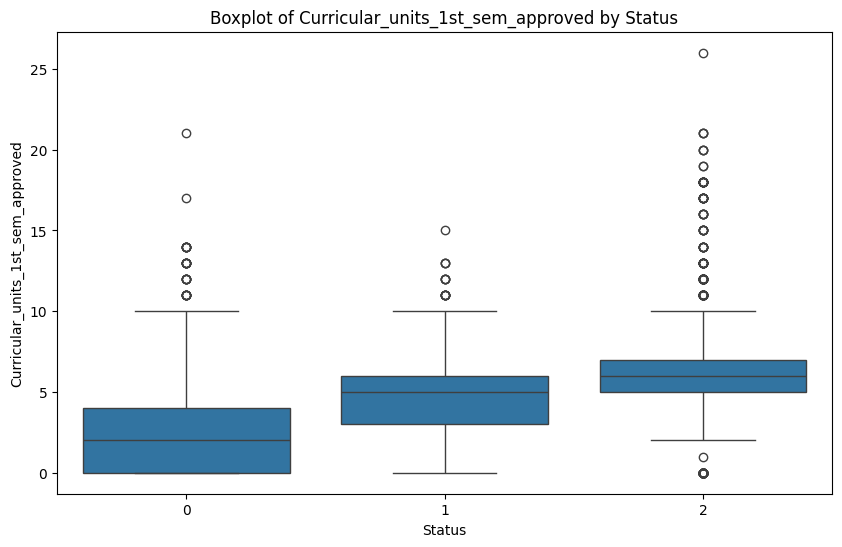

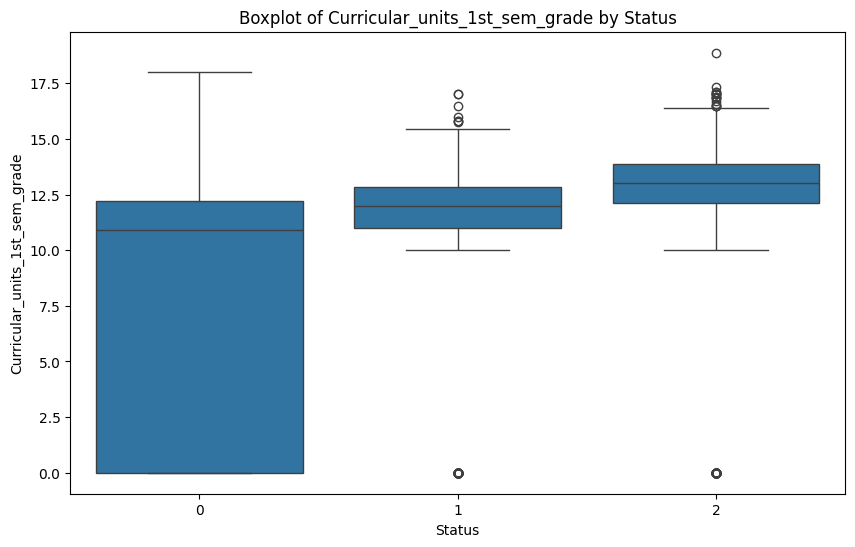

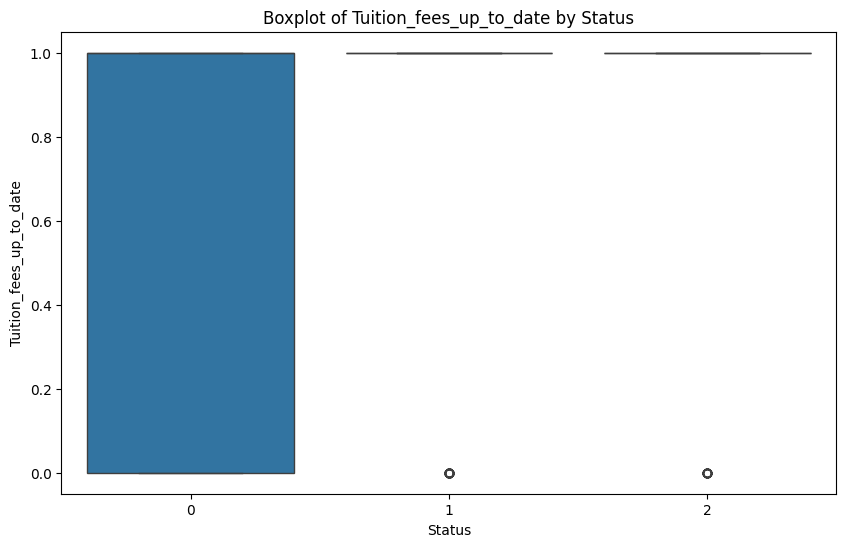

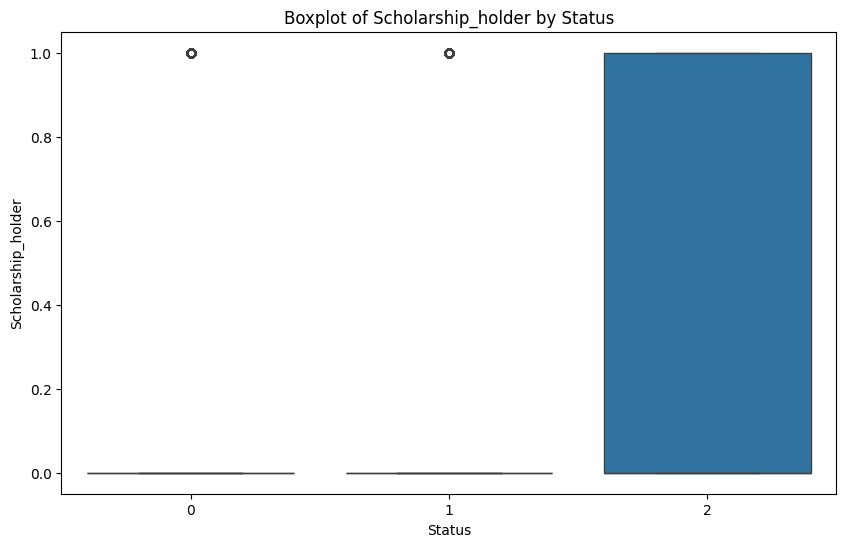

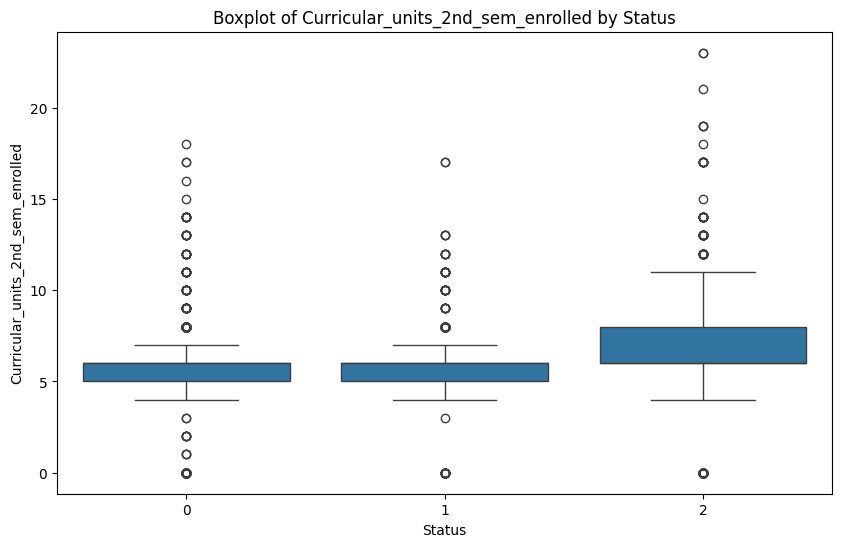

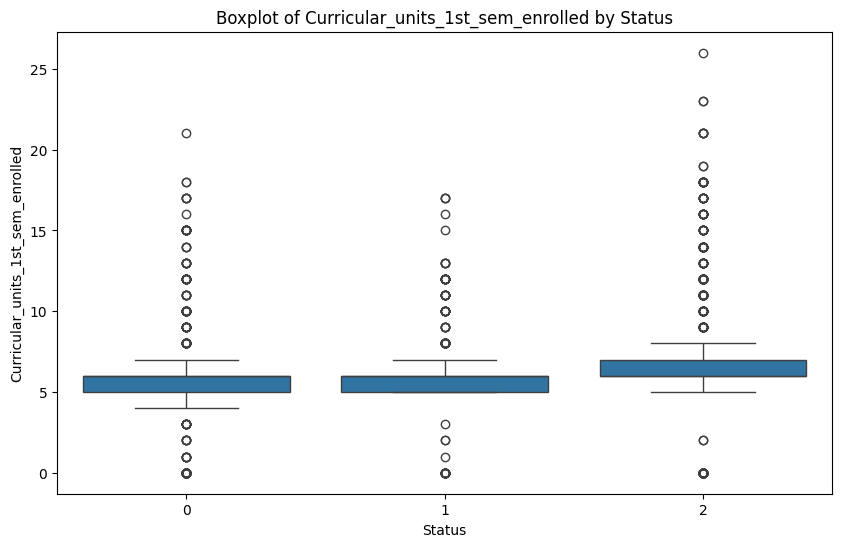

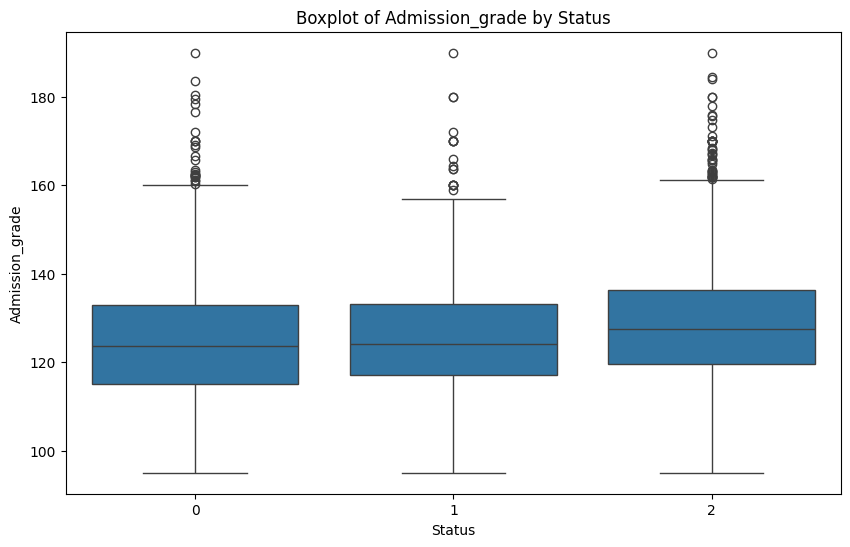

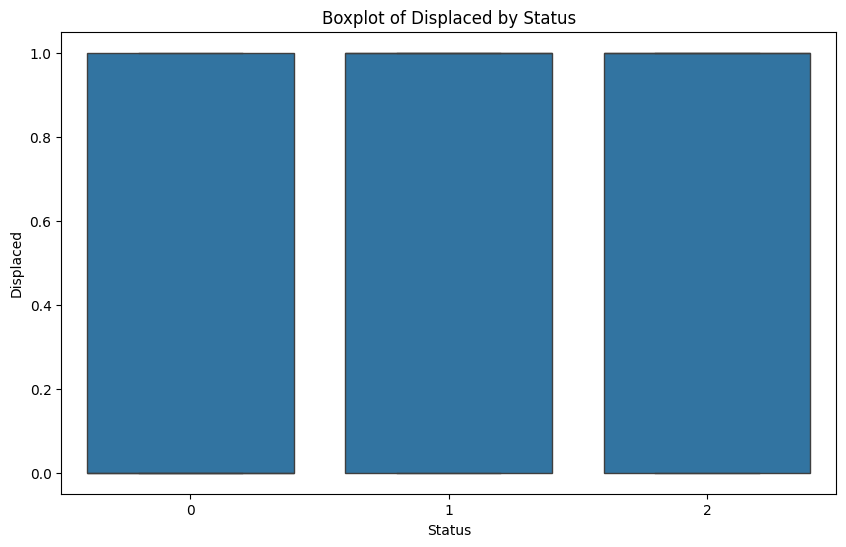

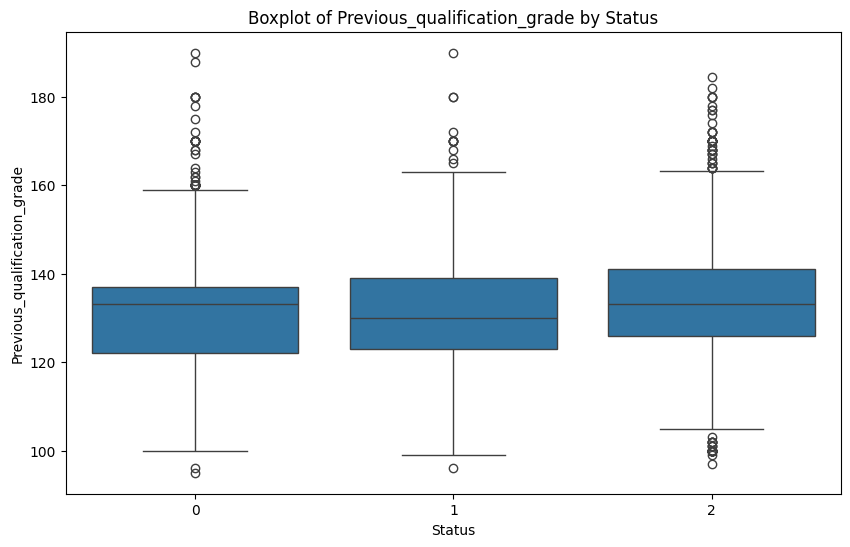

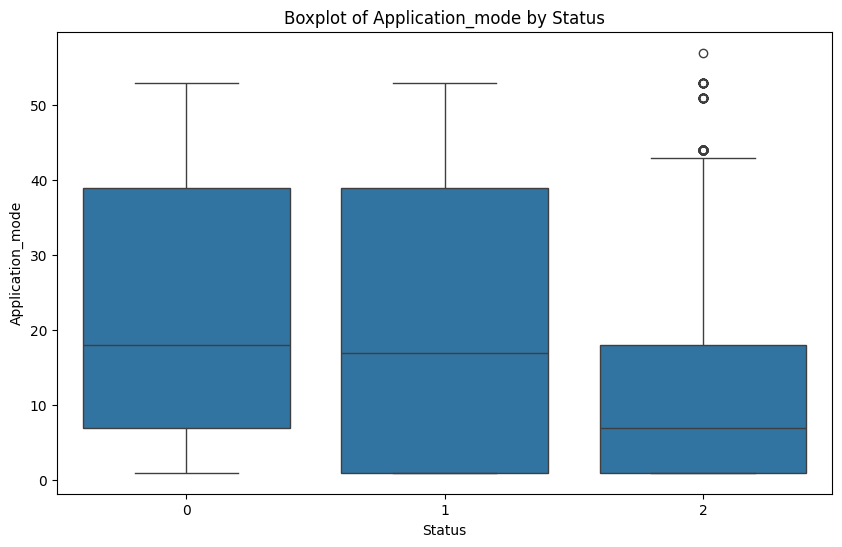

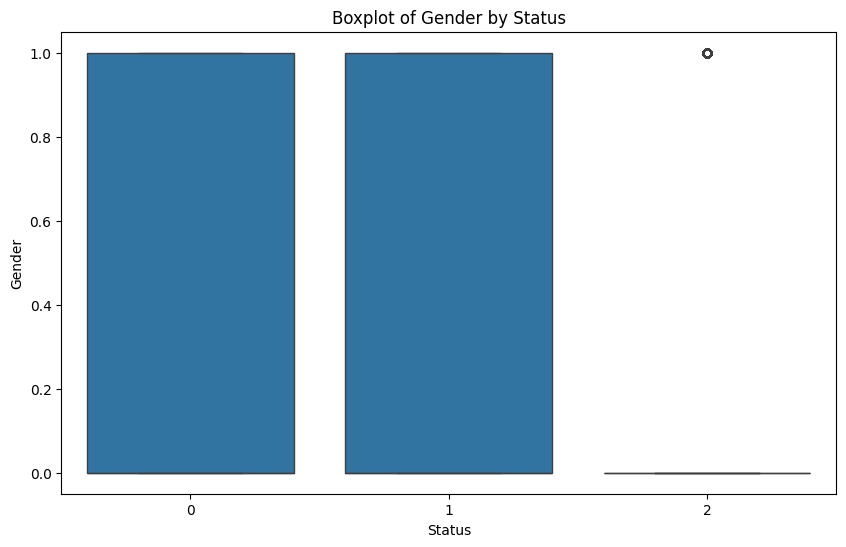

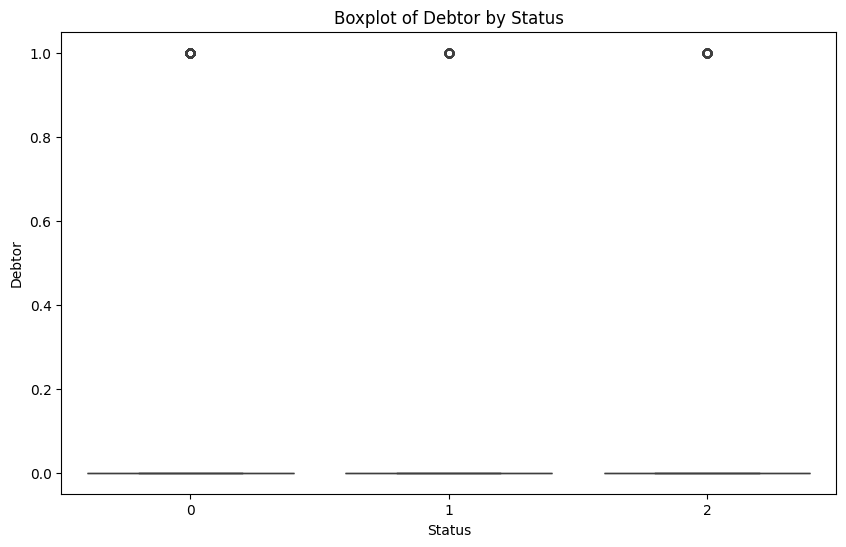

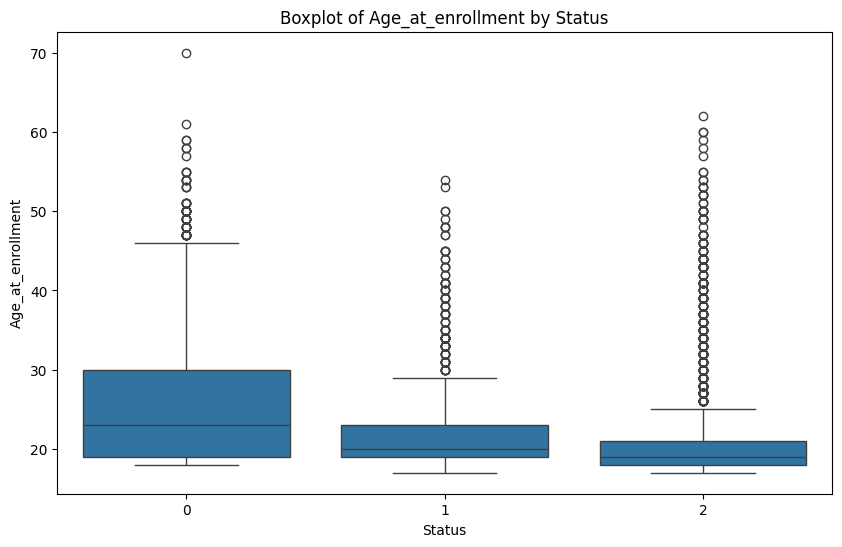

In [36]:
# Analisis korelasi dengan variabel target
target = 'Status'
# Menghitung korelasi antara fitur dan target
correlation_with_target = data.corr()[target].sort_values(ascending=False)
print("Korelasi dengan target (Status):")
print(correlation_with_target)
# Menampilkan fitur dengan korelasi tertinggi
top_features = correlation_with_target[abs(correlation_with_target) > 0.1].index.tolist()
print("\nFitur dengan korelasi tertinggi dengan target:")
print(top_features)
# Visualisasi fitur dengan korelasi tertinggi  
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[target], y=data[feature])
    plt.title(f'Boxplot of {feature} by {target}')
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()

## Data Preparation / Preprocessing

Selanjutnya menyiapkan data hingga siap untuk masuk ke proses training, terdapat beberapa hal yang dilakukan :
1. Melakukan scalling pada fitur ordinal dan numerik
2. Mengubah data "Status" menjadi numerik menggunakan label encoder
3. Menghitung distribusi status
4. Melakukan undersampling dan oversampling agar memiliki jumlah data yang sama besar dengan class 0 (Drop out)
5. Memisahkan data fitur dan target 
6. Melakukan pembagian dataset dengan skema 80% Training dan 20% testing

In [37]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
['Status', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced', 'Previous_qualification_grade', 'Application_mode', 'Gender', 'Debtor', 'Age_at_enrollment']

In [39]:
# Scalling pada fitur ordinal dan numerik
features_to_scale = ['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_enrolled','Curricular_units_1st_sem_enrolled','Admission_grade','Previous_qualification_grade','Age_at_enrollment']
scaler = MinMaxScaler()
for feature in features_to_scale:
    df[feature] = scaler.fit_transform(df[[feature]])
    print(f"Fitur {feature} telah diskalakan.")



Fitur Curricular_units_2nd_sem_approved telah diskalakan.
Fitur Curricular_units_2nd_sem_grade telah diskalakan.
Fitur Curricular_units_1st_sem_approved telah diskalakan.
Fitur Curricular_units_1st_sem_grade telah diskalakan.
Fitur Curricular_units_2nd_sem_enrolled telah diskalakan.
Fitur Curricular_units_1st_sem_enrolled telah diskalakan.
Fitur Admission_grade telah diskalakan.
Fitur Previous_qualification_grade telah diskalakan.
Fitur Age_at_enrollment telah diskalakan.


In [40]:
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,0.284211,1,19,12,...,0,0.00000,0,0.00,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0,0.26087,6,0.30,0.735897,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0,0.26087,0,0.00,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0,0.26087,10,0.25,0.667692,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0,0.26087,6,0.30,0.700000,0,13.9,-0.3,0.79,Graduate


In [41]:
# Mengubah kolom target menjadi numerik
df['Status'] = label_encoder.fit_transform(df['Status'])
df.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,0.284211,1,19,12,...,0,0.00000,0,0.00,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,0.684211,1,1,3,...,0,0.26087,6,0.30,0.735897,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,0.284211,1,37,37,...,0,0.26087,0,0.00,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,0.284211,1,38,37,...,0,0.26087,10,0.25,0.667692,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,0.052632,1,37,38,...,0,0.26087,6,0.30,0.700000,0,13.9,-0.3,0.79,2


In [52]:
# Menghitung jumlah kelas pada kolom target
print("Jumlah kelas pada kolom target 'Status':")
print(df['Status'].value_counts())


Jumlah kelas pada kolom target 'Status':
Status
2    2209
0    1421
1     794
Name: count, dtype: int64


In [53]:
# Melakukan oversampling dan undresampling
from sklearn.utils import resample
# memisahkan kkelas 0 dan 2
class_0 = df[df['Status'] == 0]
class_2 = df[df['Status'] == 2]
class_1 = df[df['Status'] == 1]
# Oversampling kelas minoritas (kelas 1)
class_1_upsampled = resample(class_1, 
                              replace=True,     # sampling dengan penggantian
                              n_samples=len(class_0),    # jumlah sampel yang diinginkan
                              random_state=42) # untuk reproduktifitas

# Downsampling kelas mayoritas (kelas 2)
class_2_downsampled = resample(class_2, 
                                 replace=False,    # sampling tanpa penggantian
                                 n_samples=len(class_0),     # jumlah sampel yang diinginkan
                                 random_state=42) # untuk reproduktifitas

# Menggabungkan kembali kelas-kelas
df_balanced = pd.concat([class_0, class_1_upsampled, class_2_downsampled])
# Mengacak ulang data
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df_balanced.head(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,1,3,9085,1,1,0.547368,1,19,19,...,0,0.260870,6,0.30,0.825641,0,13.9,-0.3,0.79,2
1,1,42,1,9003,1,1,0.473684,1,19,19,...,0,0.260870,11,0.20,0.646154,0,15.5,2.8,-4.06,1
2,1,1,1,9670,1,1,0.252632,1,1,19,...,0,0.260870,9,0.20,0.592308,0,10.8,1.4,1.74,1
3,1,39,1,9003,1,19,0.401053,1,37,37,...,0,0.260870,14,0.25,0.653846,0,16.2,0.3,-0.92,1
4,1,17,1,9147,1,1,0.463158,1,38,38,...,0,0.217391,10,0.00,0.000000,0,9.4,-0.8,-3.12,1


In [55]:
# Menghitung jumlah kelas pada kolom target
print("Jumlah kelas pada kolom target 'Status' setelah under sampling:")
print(df_balanced['Status'].value_counts())

Jumlah kelas pada kolom target 'Status' setelah under sampling:
Status
2    1421
1    1421
0    1421
Name: count, dtype: int64


In [56]:
# Memisahkan fitur dan target
X = df_balanced[['Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Tuition_fees_up_to_date', 'Scholarship_holder', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_enrolled', 'Admission_grade', 'Displaced', 'Previous_qualification_grade', 'Application_mode', 'Gender', 'Debtor', 'Age_at_enrollment']]
y = df_balanced['Status']

In [57]:
# Membagi dataset training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Selanjutnya melatih model random forest untuk tugas klasifikasi saat ini 

In [58]:
# Melatih model Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

## Evaluation

Setelah melakukan training dilanjutkan tahap evalusi dengan menghitung:
1. Akurasi model
2. Precission, recall dan f1-score
3. Setelah model mendapatkan akurasi yang cukup baik dilanjutkan menyimpan model

In [59]:
# Menghitung akurasi model pada data uji
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Random Forest: {accuracy:.2f}")

Akurasi model Random Forest: 0.82


In [ ]:
# Menghitung dan menampilkan confusion matrix dan classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[207  50  32]
 [ 17 251  16]
 [  9  26 245]]
              precision    recall  f1-score   support

           0       0.89      0.72      0.79       289
           1       0.77      0.88      0.82       284
           2       0.84      0.88      0.86       280

    accuracy                           0.82       853
   macro avg       0.83      0.83      0.82       853
weighted avg       0.83      0.82      0.82       853



In [63]:
# Simpan Model
joblib.dump(rf_model, 'model/rf_model.pkl')

['model/rf_model.pkl']